In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from houseprice_functions import outliers
import matplotlib.patches as mpatches
import seaborn as sns
import houseprice_functions as hpf

sns.set_style("dark")
sns.set(rc={'figure.figsize':(11.7,8.27)})

%load_ext autoreload
%autoreload 2

In [3]:
HousePrices = pd.read_csv("data/train.csv")

In [4]:
HousePrices.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1376,1377,30,RL,52.0,6292,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,91000
958,959,20,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,185000
323,324,20,RM,49.0,5820,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,126175
814,815,50,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,116000
1277,1278,80,RL,NaN,17871,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,197900


In [5]:
HousePrices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
print(len(HousePrices.columns),
      '\n\n',
HousePrices.columns)

81 

 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pave

In [7]:
HousePrices.isnull().sum(axis=0).sort_values(ascending = False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [8]:
mv = HousePrices.isnull().sum().sum()
dp = HousePrices.shape[0]*HousePrices.shape[1]
print(
    "\nRows:",
    len(HousePrices),
    "\nMissing values:",
    mv,
    "\ndatapoints:",
    dp,
    "\nMissingness:",
    str(round((mv/dp)*100,2)) +'%'
    
)


Rows: 1460 
Missing values: 6965 
datapoints: 118260 
Missingness: 5.89%


In [9]:
for col in HousePrices:
    print('=='*50)
    print(
        "Column name:",
        col,
        "\nData type:",
        HousePrices[[col]].dtypes[0],
        "\nNumber of Unique values:",
        HousePrices[[col]].nunique()[0],
          '\nMissing Values:',
          HousePrices[[col]].isnull().sum(axis=0)[0]
         )
    if HousePrices[[col]].nunique()[0] <= 20:
        print("\nValues:")
        for i in HousePrices[col].unique():
                print("  "+str(i))
                print("      Count:   " + str(sum(HousePrices[col] == i))),
#                print("      Sample:" + str(np.random.choice(np.where(HousePrices[col] == i)[0],5)))
        if HousePrices[[col]].nunique()[0] == 2:
            print('***BOOL***'*5)
        else:
            print("***Categorical***"*5)
    if (HousePrices[[col]].dtypes[0] == np.int64()) or (HousePrices[[col]].dtypes[0] == np.float64()):
        HousePrices[[col]] = HousePrices[[col]].dropna()
        print(
            "\nMax:",
            max(HousePrices[col]),
            "\nMin:",
            min(HousePrices[col]),
            "\naverage:",
            round(np.mean(HousePrices[col]),2),
            "\nStandard Deviation:",
            round(np.std(HousePrices[col]),2)
            
        )

Column name: Id 
Data type: int64 
Number of Unique values: 1460 
Missing Values: 0

Max: 1460 
Min: 1 
average: 730.5 
Standard Deviation: 421.47
Column name: MSSubClass 
Data type: int64 
Number of Unique values: 15 
Missing Values: 0

Values:
  60
      Count:   299
  20
      Count:   536
  70
      Count:   60
  50
      Count:   144
  190
      Count:   30
  45
      Count:   12
  90
      Count:   52
  120
      Count:   87
  30
      Count:   69
  85
      Count:   20
  80
      Count:   58
  160
      Count:   63
  75
      Count:   16
  180
      Count:   10
  40
      Count:   4
***Categorical******Categorical******Categorical******Categorical******Categorical***

Max: 190 
Min: 20 
average: 56.9 
Standard Deviation: 42.29
Column name: MSZoning 
Data type: object 
Number of Unique values: 5 
Missing Values: 0

Values:
  RL
      Count:   1151
  RM
      Count:   218
  C (all)
      Count:   10
  FV
      Count:   65
  RH
      Count:   16
***Categorical******Categorical*****

Column name: MasVnrArea 
Data type: float64 
Number of Unique values: 327 
Missing Values: 8

Max: 1600.0 
Min: 0.0 
average: 103.69 
Standard Deviation: 181.0
Column name: ExterQual 
Data type: object 
Number of Unique values: 4 
Missing Values: 0

Values:
  Gd
      Count:   488
  TA
      Count:   906
  Ex
      Count:   52
  Fa
      Count:   14
***Categorical******Categorical******Categorical******Categorical******Categorical***
Column name: ExterCond 
Data type: object 
Number of Unique values: 5 
Missing Values: 0

Values:
  TA
      Count:   1282
  Gd
      Count:   146
  Fa
      Count:   28
  Po
      Count:   1
  Ex
      Count:   3
***Categorical******Categorical******Categorical******Categorical******Categorical***
Column name: Foundation 
Data type: object 
Number of Unique values: 6 
Missing Values: 0

Values:
  PConc
      Count:   647
  CBlock
      Count:   634
  BrkTil
      Count:   146
  Wood
      Count:   3
  Slab
      Count:   24
  Stone
      Count:   6
***Cat


Max: 3 
Min: 0 
average: 0.61 
Standard Deviation: 0.64
Column name: FireplaceQu 
Data type: object 
Number of Unique values: 5 
Missing Values: 690

Values:
  nan
      Count:   0
  TA
      Count:   313
  Gd
      Count:   380
  Fa
      Count:   33
  Ex
      Count:   24
  Po
      Count:   20
***Categorical******Categorical******Categorical******Categorical******Categorical***
Column name: GarageType 
Data type: object 
Number of Unique values: 6 
Missing Values: 81

Values:
  Attchd
      Count:   870
  Detchd
      Count:   387
  BuiltIn
      Count:   88
  CarPort
      Count:   9
  nan
      Count:   0
  Basment
      Count:   19
  2Types
      Count:   6
***Categorical******Categorical******Categorical******Categorical******Categorical***
Column name: GarageYrBlt 
Data type: float64 
Number of Unique values: 97 
Missing Values: 81

Max: 2010.0 
Min: 1900.0 
average: 1978.51 
Standard Deviation: 24.68
Column name: GarageFinish 
Data type: object 
Number of Unique values: 3 
Mi

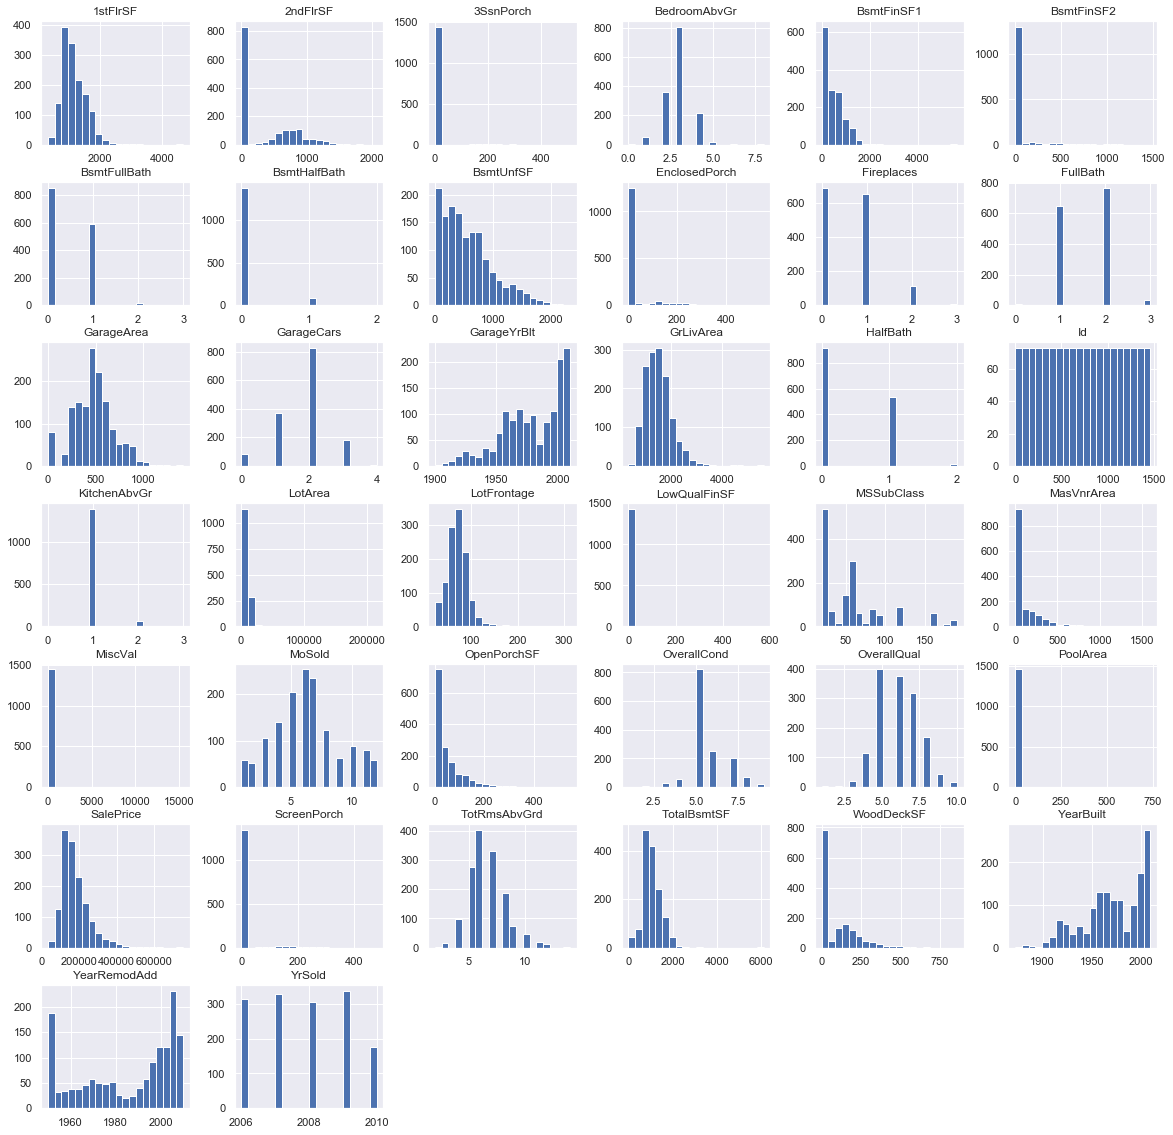

In [10]:
hist = HousePrices.hist(bins=20,figsize = (20,20))

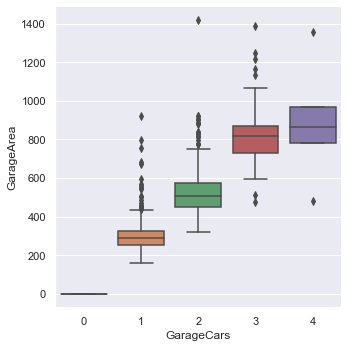

In [11]:
import seaborn as sns
sns.catplot(data = HousePrices, x = "GarageCars", y = "GarageArea", kind = "box")
plt.show()

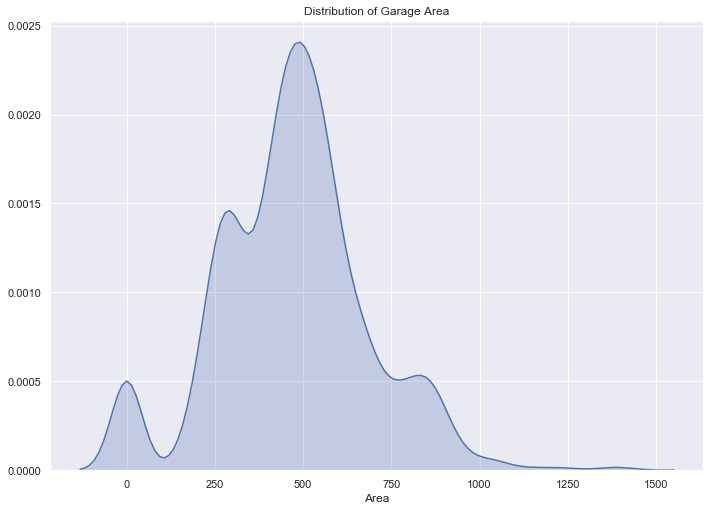

In [12]:
ax = sns.kdeplot(HousePrices["GarageArea"], shade=True, color="b",legend = False)
plt.title('Distribution of Garage Area')
plt.xlabel('Area')
plt.show()

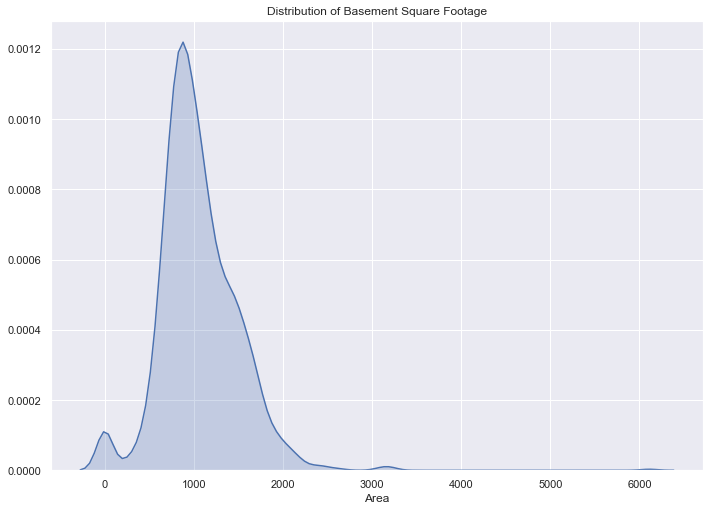

In [13]:
ax = sns.kdeplot(HousePrices["TotalBsmtSF"], shade=True, color="b",legend = False)
plt.title('Distribution of Basement Square Footage')
plt.xlabel('Area')
plt.show()

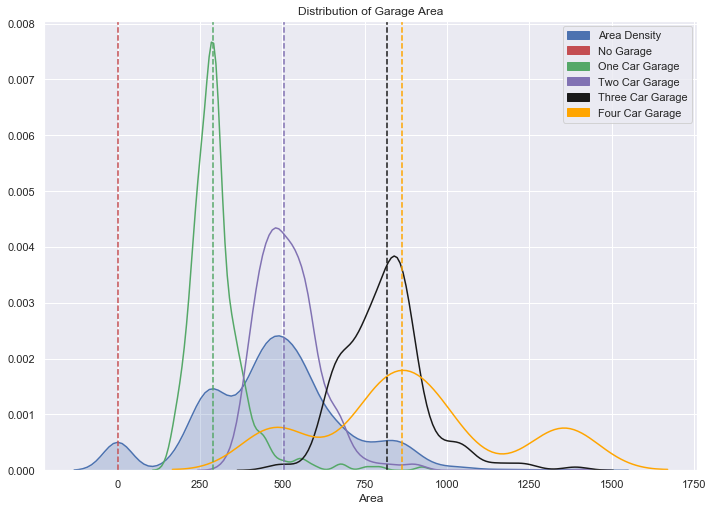

In [14]:
g_num_avg = HousePrices[['GarageCars','GarageArea']].groupby('GarageCars').agg('median')

ax = sns.kdeplot(HousePrices["GarageArea"], shade=True, color="b",legend = False)
ax = sns.kdeplot(HousePrices.loc[(HousePrices["GarageCars"] == 1),'GarageArea'], shade=False, color="g") 
ax = sns.kdeplot(HousePrices.loc[(HousePrices["GarageCars"] == 2),'GarageArea'], shade=False, color="m") 
ax = sns.kdeplot(HousePrices.loc[(HousePrices["GarageCars"] == 3),'GarageArea'], shade=False, color="k") 
ax = sns.kdeplot(HousePrices.loc[(HousePrices["GarageCars"] == 4),'GarageArea'], shade=False, color="orange") 

plt.axvline(g_num_avg['GarageArea'][0],linestyle="--",c = 'r')
plt.axvline(g_num_avg['GarageArea'][1],linestyle="--", c = 'g')
plt.axvline(g_num_avg['GarageArea'][2],linestyle="--",c = 'm')
plt.axvline(g_num_avg['GarageArea'][3],linestyle="--",c = 'k')
plt.axvline(g_num_avg['GarageArea'][4],linestyle="--",c = 'orange')
plt.title('Distribution of Garage Area')
plt.xlabel('Area')

#Legend
no_g = mpatches.Patch(color='r', label='No Garage')
one_c = mpatches.Patch(color = 'g', label = "One Car Garage")
two_c = mpatches.Patch(color='m', label='Two Car Garage')
three_c = mpatches.Patch(color='k', label='Three Car Garage')
four_c = mpatches.Patch(color='orange', label='Four Car Garage')
dist_ = mpatches.Patch(color = 'b', label ="Area Density")
plt.legend(handles=[dist_,no_g,one_c,two_c,three_c,four_c])

plt.show()

#### 1. Electrical
 - original data is ordinal catagorical
  1. only has one missing value
  2. only 3 poorly rated
  3. not sure if SBrkr is worse or better than most
   - for now this is one I think we should drop and consider adding in later as an ordinal catagorical feature or bool

#### 2. CentralAir
 - bool 0 1

#### 3. HeatingQC
 - ordinal categorical 1-5 OR 1-4 combining FA and Po

#### 4. Heating
 - Bool Gas or not
 

#### 5. Utilities
 - drop column.  Bool with 1459 same and 1 different

#### 6. GarageCond
 - ordinal categorical
 - keep either this value or GarageQual but not both


#### 7. GarageType
 - catigorical 
  1. NA to 0 indicates no garage
   - can reduce number of categorise too
 
#### 8. GarageQual
 - ordinal categorical
 - keep either this value or GarageCond but not both

#### 9. GarageFinish
 - bool (Fin Rfn) vs (unf NA)
 - Ordinal Cat all 4

#### 10. GarageCars
- keep either this number or Garage area but not both

#### 11. GarageArea
- keep either this number or Garage cars but not both



#### 12. GarageYrBlt
 - I think the year it is built doesnt really matter if the Quality is high or low
  1. not including this could be something to add in later


# Basement
BsmtCond - basement quality can probably take this over
BsmtExposure
BsmtFinType1
BsmtFinType2
#### 13. TotalBsmtSF
 - keep this as a column


#### 14. BsmtFinSF1
 - remove

#### 15. BsmtFinSF2
 - remove 

#### 16. BsmtUnfSF
 - Create new bool column called (Finished basement) where you take the rows finished to unfinished ratio and if its at least 70% finished give it a bool 1


#### 17. Fence
 - group Gd and Mn
  1. make it three values (No Fence) (Good Fence) (bad Fence)
   a) maybe continuous?


#### 18. 3SsnPorch
 - This is the square footage of a 3 season porch if the house has one, switch this to a bool 1 0 for having one and combine it with other porch information
 
 #### I dont have basement Quality but I think it should be ordinal and included

In [68]:
x = hpf.outliers(HousePrices,HousePrices[['GarageArea','TotalBsmtSF','GarageCars']],method = 'outlier_df',num_sd = 2,operator = 'all')
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
520,521,190,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,106250
533,534,20,RL,50.0,5000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,39300
705,706,190,RM,70.0,5600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Othr,3500,7,2010,WD,Normal,55000
1011,1012,90,RL,75.0,9825,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,100000
1179,1180,20,RL,77.0,8335,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,93000
1218,1219,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,80500
